In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import re
import seaborn as sns

## Data set was downloaded from:
https://www.kaggle.com/andreazzini/international-airline-passengers#international-airline-passengers.csv

In [37]:
# load the dataset
entire_data_set = pd.read_csv('../data/raw/international-airline-passengers.csv')
entire_data_set.rename(columns={entire_data_set.columns[1]: "passenger_number",
                                entire_data_set.columns[0]: "year_month" }, inplace = True)
entire_data_set = entire_data_set[:-1]
entire_data_set

,year_month,passenger_number
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [39]:
entire_data_set["month"] = entire_data_set["year_month"].apply(lambda x: re.sub("\d\d\d\d-0?", "", x))
entire_data_set

,year_month,passenger_number,month
0,1949-01,112.0,1
1,1949-02,118.0,2
2,1949-03,132.0,3
3,1949-04,129.0,4
4,1949-05,121.0,5
...,...,...,...
139,1960-08,606.0,8
140,1960-09,508.0,9
141,1960-10,461.0,10
142,1960-11,390.0,11


## Length of the available time series

In [40]:
print(f"There are {len(entire_data_set)} monthly totals in thousands")

There are 144 monthly totals in thousands


## Visualization of the time series

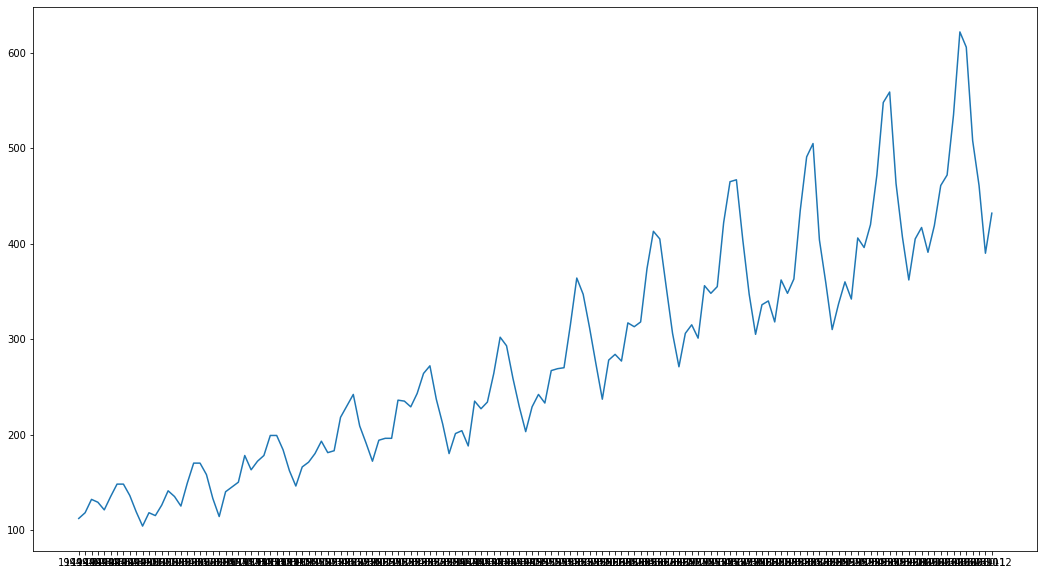

In [41]:
fig = plt.figure(figsize=(18, 10))
line_plot = fig.add_subplot(111)
line_plot.plot(entire_data_set.year_month, entire_data_set.passenger_number)

### The visualization of the series revealed that there is a very strong yearly seasonality. Let's confirm that by calculating autocorrelation. 

### The numpy autocorr function computes the Pearson correlation between the series and its shifted self. I shifted it by 12, since I want to find out how strong the yearly seasonality is.

In [24]:
entire_data_set["passenger_number"].autocorr(12)

0.990527369208544

### Let's calculate the autocorrelation for different months as well:

In [51]:
autocorrelation_all_months = []
for i in range(12):
    autocorrelation = entire_data_set["passenger_number"].autocorr(i + 1)
    print(autocorrelation)
    autocorrelation_all_months.append(autocorrelation)

0.9601946480498523
0.8956753113926396
0.837394765081794
0.7977346989350624
0.7859431491184304
0.7839187959206183
0.7845921291388301
0.7922150472595747
0.8278519011167601
0.8827127951607838
0.9497020331006317
0.990527369208544


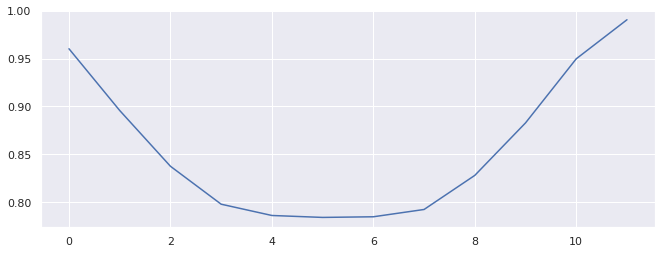

In [52]:
plt.plot(autocorrelation_all_months)

### There is a very strong autocorrelation with the most recent months as well the months about one year ago.

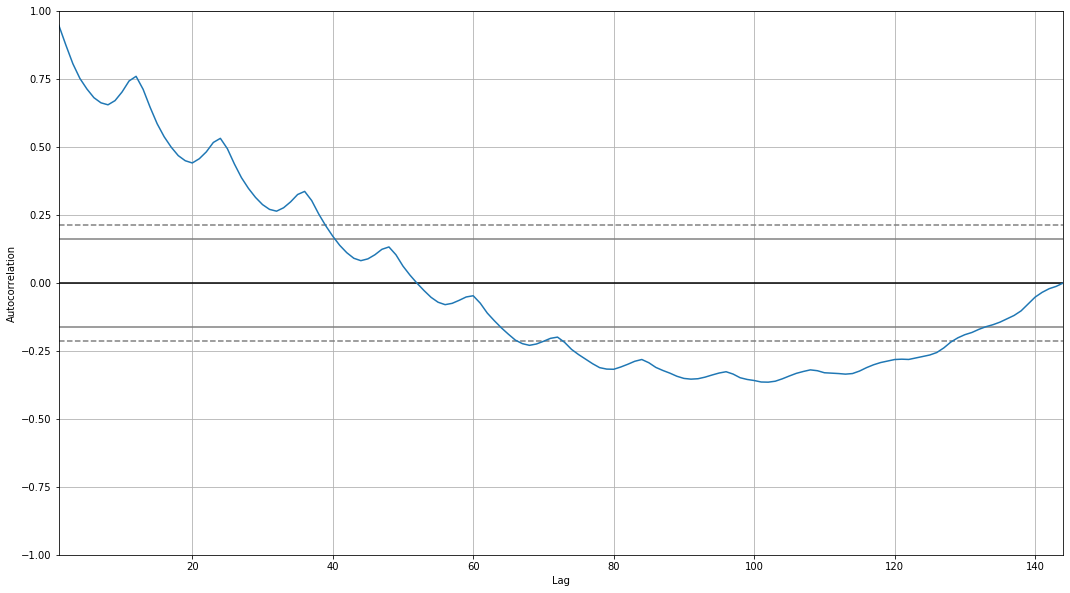

In [30]:
fig = plt.figure(figsize=(18, 10))
autocorrelation_plot(entire_data_set.set_index('year_month'))
plt.show()

### Pearson correlation coefficient is almost equal to 1, i.e. there is a very strong linear association between the current number of airline passengers and the number of passengers one year ago.

### Let's find out which month has the highest number of airline passengers.

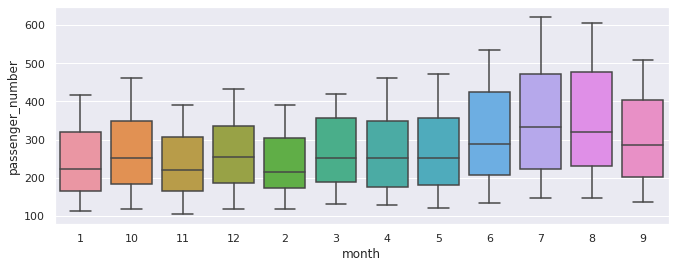

In [46]:
sns.set(rc={'figure.figsize':(11, 4)})
sns.boxplot(data=entire_data_set, x='month', y='passenger_number')

### The yearly peak seems to be reached in July/August. It is not suprising since these months happen to be holiday season in many countries.